In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import pytesseract
import pandas as pd
import os

from pytesseract_utils import *

In [2]:
def extract_commutator_table_from_image(image, image_name) -> pd.DataFrame:
    """
    Given an image, extracts commutators table
    """
    extracted_text = pytesseract.image_to_string(image, lang="spa")
    lines = extracted_text.splitlines()
    lines = [line.strip() for line in lines if len(line) > 10]

    lines, group_line = find_group_line(lines)
    group_name = extract_group_name(group_line)
    
    lines = keep_relevant_lines(lines)    
    commutators = extract_commutator_from_line(lines)

    commutators_df = pd.DataFrame(commutators)
    commutators_df["group"] = group_name
    commutators_df["filename"] = image_name

    return commutators_df

In [3]:
directory_path = "/home/sheriff/Downloads/edges_comms_screenshots_guille"

In [5]:
directory_path = "/home/sheriff/Downloads/cor"

In [8]:
dfs = []

for i, filename in enumerate(os.listdir(directory_path)):
    image_path = os.path.join(directory_path, filename)
    image = Image.open(image_path)
    image = ImageOps.invert(image.convert("RGB"))

    try:
        df = extract_commutator_table_from_image(image, filename)
    except Exception as e:
        print("error", filename, e)
    else:
        dfs.append(df)

    if i % 10 == 0:
        print(i)

error IMG-20241130-WA0022.jpg cannot unpack non-iterable NoneType object
0


In [7]:
df = pd.concat(dfs)

ValueError: No objects to concatenate

In [6]:
len(dfs)

78

In [7]:
len(df)

736

In [8]:
ok_chars = "qwertyuioplkjhgfdsazxcvbnmñ" + "QWERTYUIOPLKJHGFDSAZXCVBNMÑ" + "Ó2()'. "

In [9]:
images_chars = set(''.join(df.commutator.values.tolist()))

In [10]:
for ch in images_chars:
    if ch not in ok_chars:
        print(ch)

### errores

algunas imágenes llevaban errores, los hago a mano y los junto

y ahora lo importo y ordeno

In [11]:
import pandas as pd

In [12]:
df = pd.read_excel("./edges_commutators_tratados.xlsx")

In [14]:
df.shape

(786, 5)

In [12]:
df.head()

,first_letter,second_letter,commutator,group,filename
0,Y,R,M2' (Ins R.) M' (Unins R.) M',E-Con: Y.../...Y. (R Outside.),IMG-20241119-WA0063.jpg
1,R,Y,M (Ins R.) M (Unins R.) M2',E-Con: Y.../...Y. (R Outside.),IMG-20241119-WA0063.jpg
2,Y,C,M2' (Ins C.) M' (Unins C. Can.) r,E-Con: Y.../...Y. (R Outside.),IMG-20241119-WA0063.jpg
3,C,Y,r' (Can. Ins C.) M (Unins C.) R' r2,E-Con: Y.../...Y. (R Outside.),IMG-20241119-WA0063.jpg
4,Y,M,M2' (Ins M.) M' (Ins R.) M',E-Con: Y.../...Y. (R Outside.),IMG-20241119-WA0063.jpg


In [18]:
df.first_letter.value_counts().head()

first_letter
B    45
R    42
Z    41
M    41
V    39
Name: count, dtype: int64

In [20]:
df.sort_values("filename").to_excel("./edges_commutators_tratados2.xlsx", index=False)

Ahora se lo paso a Guille y que lo repase y limpie

### análisis imágenes

In [27]:
filename = "IMG-20241119-WA0017.jpg"
image_path = os.path.join(directory_path, filename)
image = Image.open(image_path)
image = ImageOps.invert(image.convert("RGB"))

(-0.5, 738.5, 1599.5, -0.5)

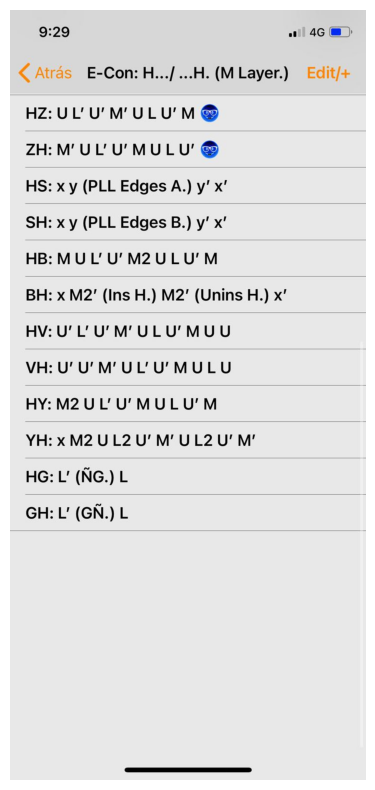

In [28]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')